# Data balancing
Data balancing techniques are needed in the presence of unbalanced datasets - when the target variable doesn't have a uniform distribution, i.e. the classes are not equiprobable. In the case of binary classification, we usually call positive to the minority class, and negative to the majority one.

We can follow two different strategies: undersampling and oversampling. The choice of each one of them, depends on the size of the dataset, i.e., the number of records to use as train:

1. with a huge dataset, and consequently a considerable number of positve records, we can use an undersampling strategy, keeping the positive records and sampling the negative ones to balance the final distribution -
2. In the presence of a small number of positive records, we need to appy oversampling, in order to create a larger set to support the training step. Among the different oversampling techniques we find SMOTE, one of the most interesting ones.

Lets consider the unbalanced dataset, whose target is the Outcome variable, with two possible values: Active the minority class, and Inactive as the majority class. The following chart shows the original target distribution, and the following one the resulting distribution after applying each strategy.

### Note: Although data balancing should be done only on the training set, on this file we are using the whole dataset since no classification will be necessary.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

## Class Balance

### Toxicity

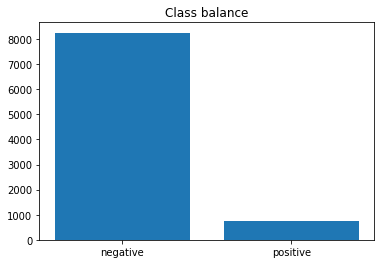

Minority class: 741
Majority class: 8251
Proportion: 0.09 : 1


In [9]:
tox_target_count = data_tox['classification'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(tox_target_count.index, tox_target_count.values)
plt.show()

min_class = tox_target_count.idxmin()
ind_min_class = tox_target_count.index.get_loc(min_class)

print('Minority class:', tox_target_count[ind_min_class])
print('Majority class:', tox_target_count[1-ind_min_class])
print('Proportion:', round(tox_target_count[ind_min_class] / tox_target_count[1-ind_min_class], 2), ': 1')

### Heart failure

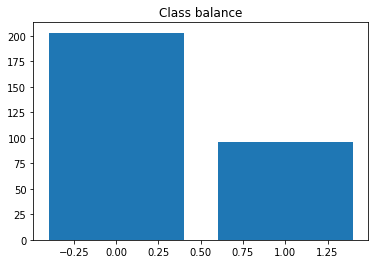

Minority class: 96
Majority class: 203
Proportion: 0.47 : 1


In [8]:
heart_target_count = data_heart['DEATH_EVENT'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(heart_target_count.index, heart_target_count.values)
plt.show()

min_class = heart_target_count.idxmin()
ind_min_class = heart_target_count.index.get_loc(min_class)

print('Minority class:', heart_target_count[ind_min_class])
print('Majority class:', heart_target_count[1-ind_min_class])
print('Proportion:', round(heart_target_count[ind_min_class] / heart_target_count[1-ind_min_class], 2), ': 1')

## Under-sampling

### NearMiss

In [ ]:
from imblearn.under_sampling import NearMiss

data_tox = pd.read_csv('../CD databases/qsar_oral_toxicity.csv')

y_tox: np.ndarray = data_tox.pop('classification').values
X_tox: np.ndarray = data_tox.values
print('Original dataset shape %s' % Counter(y_tox))

nm = NearMiss()
X_tox1, y_tox1 = nm.fit_resample(X_tox, y_tox)
print('Resampled dataset shape %s' % Counter(y_tox1))

In [44]:
data_heart = pd.read_csv('../CD databases/heart_failure_clinical_records_dataset.csv')

y_heart: np.ndarray = data_heart.pop('DEATH_EVENT').values
X_heart: np.ndarray = data_heart.values
print('Original dataset shape %s' % Counter(y_heart))

nm = NearMiss()
X_heart1, y_heart1 = nm.fit_resample(X_heart, y_heart)
print('Resampled dataset shape %s' % Counter(y_heart1))

Original dataset shape Counter({0: 203, 1: 96})
Resampled dataset shape Counter({1: 96, 0: 70})


### RandomUnderSampler

In [46]:
from imblearn.under_sampling import RandomUnderSampler

data_tox = pd.read_csv('../CD databases/qsar_oral_toxicity.csv')

y_tox: np.ndarray = data_tox.pop('classification').values
X_tox: np.ndarray = data_tox.values
print('Original dataset shape %s' % Counter(y_tox))

rus = RandomUnderSampler(random_state=42)
X_tox1, y_tox1 = rus.fit_resample(X_tox, y_tox)
print('Resampled dataset shape %s' % Counter(y_tox1))

Original dataset shape Counter({'negative': 8251, 'positive': 741})
Resampled dataset shape Counter({'negative': 741, 'positive': 741})


In [47]:
data_heart = pd.read_csv('../CD databases/heart_failure_clinical_records_dataset.csv')

y_heart: np.ndarray = data_heart.pop('DEATH_EVENT').values
X_heart: np.ndarray = data_heart.values
print('Original dataset shape %s' % Counter(y_heart))

rus = RandomUnderSampler(random_state=42)
X_heart1, y_heart1 = rus.fit_resample(X_heart, y_heart)
print('Resampled dataset shape %s' % Counter(y_heart1))

Original dataset shape Counter({0: 203, 1: 96})
Resampled dataset shape Counter({0: 96, 1: 96})


## Over-sampling

### SMOTE

In [48]:
from imblearn.over_sampling import SMOTE

data_tox = pd.read_csv('../CD databases/qsar_oral_toxicity.csv')

y_tox: np.ndarray = data_tox.pop('classification').values
X_tox: np.ndarray = data_tox.values
print('Original dataset shape %s' % Counter(y_tox))

sm = SMOTE(random_state=42)
X_tox1, y_tox1 = sm.fit_resample(X_tox, y_tox)
print('Resampled dataset shape %s' % Counter(y_tox1))

Original dataset shape Counter({'negative': 8251, 'positive': 741})
Resampled dataset shape Counter({'negative': 8251, 'positive': 8251})


In [50]:
data_heart = pd.read_csv('../CD databases/heart_failure_clinical_records_dataset.csv')

y_heart: np.ndarray = data_heart.pop('DEATH_EVENT').values
X_heart: np.ndarray = data_heart.values
print('Original dataset shape %s' % Counter(y_heart))

sm = SMOTE(random_state=42)
X_heart1, y_heart1 = sm.fit_resample(X_heart, y_heart)
print('Resampled dataset shape %s' % Counter(y_heart1))

Original dataset shape Counter({0: 203, 1: 96})
Resampled dataset shape Counter({1: 203, 0: 203})


### RandomOverSampler

In [51]:
from imblearn.over_sampling import RandomOverSampler

data_tox = pd.read_csv('../CD databases/qsar_oral_toxicity.csv')

y_tox: np.ndarray = data_tox.pop('classification').values
X_tox: np.ndarray = data_tox.values
print('Original dataset shape %s' % Counter(y_tox))

ros = RandomOverSampler(random_state=42)
X_tox1, y_tox1 = ros.fit_resample(X_tox, y_tox)
print('Resampled dataset shape %s' % Counter(y_tox1))

Original dataset shape Counter({'negative': 8251, 'positive': 741})
Resampled dataset shape Counter({'negative': 8251, 'positive': 8251})


In [52]:
data_heart = pd.read_csv('../CD databases/heart_failure_clinical_records_dataset.csv')

y_heart: np.ndarray = data_heart.pop('DEATH_EVENT').values
X_heart: np.ndarray = data_heart.values
print('Original dataset shape %s' % Counter(y_heart))

ros = RandomOverSampler(random_state=42)
X_heart1, y_heart1 = ros.fit_resample(X_heart, y_heart)
print('Resampled dataset shape %s' % Counter(y_heart1))

Original dataset shape Counter({0: 203, 1: 96})
Resampled dataset shape Counter({1: 203, 0: 203})
